In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv('startup_data.csv')

df = df.drop(["Unnamed: 0", "Unnamed: 6", "id", "object_id", "name", "labels", "state_code.1"], axis=1)
df = df.drop(["latitude", "longitude", "zip_code"], axis=1)
df = df.drop(["founded_at", "first_funding_at", "last_funding_at"], axis=1)
df = df.drop(["closed_at"], axis=1)

df.head()

,state_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,Los Gatos,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,San Diego,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,Cupertino,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,San Francisco,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


## Exploratory Data Analysis

### Which states have the most startups?

In [40]:
df.groupby(["state_code"]).size() \
    .reset_index(name="startup_count") \
    .sort_values(by="startup_count", ascending=False) \
    .reset_index(drop=True) \
    .head()

,state_code,startup_count
0,CA,488
1,NY,106
2,MA,83
3,WA,42
4,TX,42


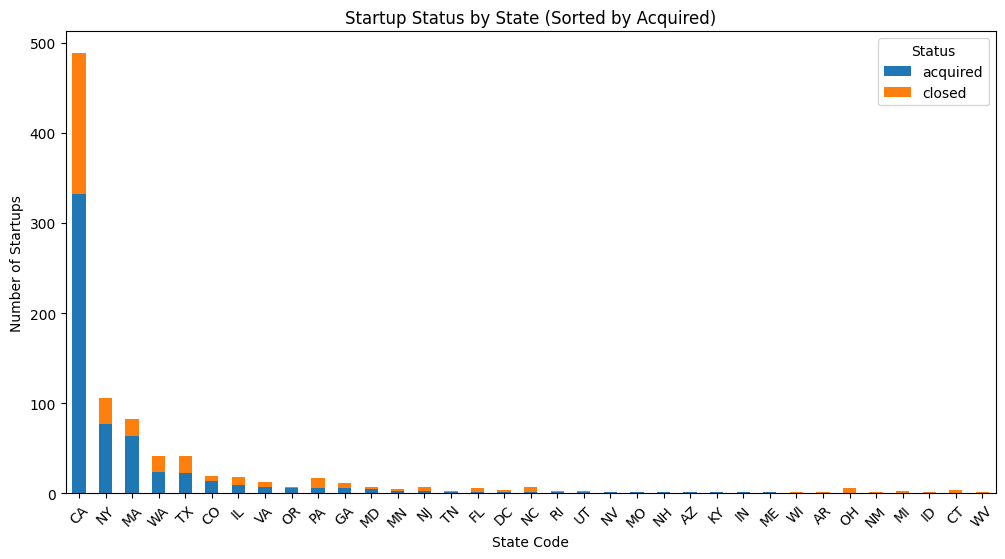

In [48]:
status_by_state = df.groupby(["state_code", "status"]).size().unstack(fill_value=0).sort_values("acquired", ascending=False)

status_by_state.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Startup Status by State (Sorted by Acquired)")
plt.xlabel("State Code")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.show()

### Which states get the most funding per startup on average?

In [153]:
state_counts = df["state_code"].value_counts()
avg_funding_per_startup_by_state = \
    df.groupby('state_code')['funding_total_usd'] \
        .mean().reset_index(name='avg_funding') \
        .sort_values('avg_funding', ascending=False) \
        .reset_index(drop=True)

avg_funding_per_startup_by_state["avg_funding_formatted"] = avg_funding_per_startup_by_state["avg_funding"].apply(lambda x: f"${x:,.0f}")
avg_funding_per_startup_by_state["sample_size"] = avg_funding_per_startup_by_state["state_code"].map(state_counts)

top_20 = avg_funding_per_startup_by_state.head(20)
top_20[["state_code", "avg_funding_formatted", "sample_size"]].head(20)

,state_code,avg_funding_formatted,sample_size
0,WA,"$149,154,143",42
1,IN,"$120,201,000",2
2,CT,"$46,325,000",4
3,CO,"$42,481,894",19
4,NC,"$38,502,331",7
5,MD,"$25,941,209",7
6,NJ,"$25,928,571",7
7,MA,"$22,002,555",83
8,TX,"$21,957,555",42
9,CA,"$20,505,749",488


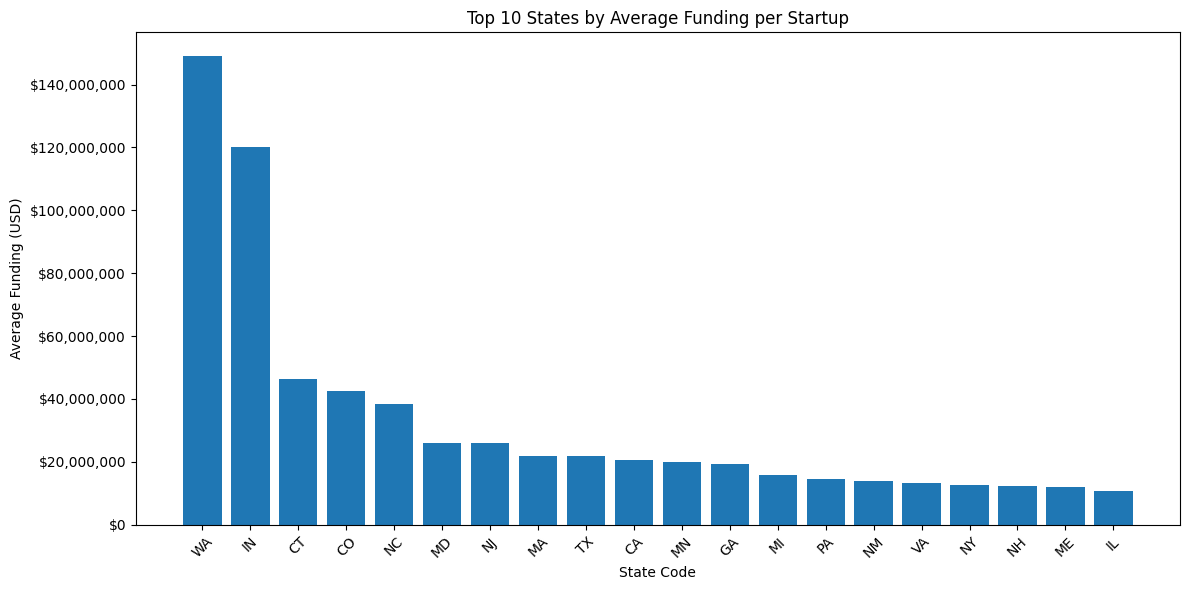

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_20['state_code'], top_20['avg_funding'])

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Top 20 States by Average Funding per Startup')
plt.xlabel('State Code')
plt.ylabel('Average Funding (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Which cities have the most startups?

In [51]:
df.groupby(["city", "state_code"]).size() \
    .reset_index(name="startup_count") \
    .sort_values(by="startup_count", ascending=False) \
    .reset_index(drop=True) \
    .head()

,city,state_code,startup_count
0,San Francisco,CA,128
1,New York,NY,91
2,Mountain View,CA,47
3,Palo Alto,CA,35
4,Santa Clara,CA,27


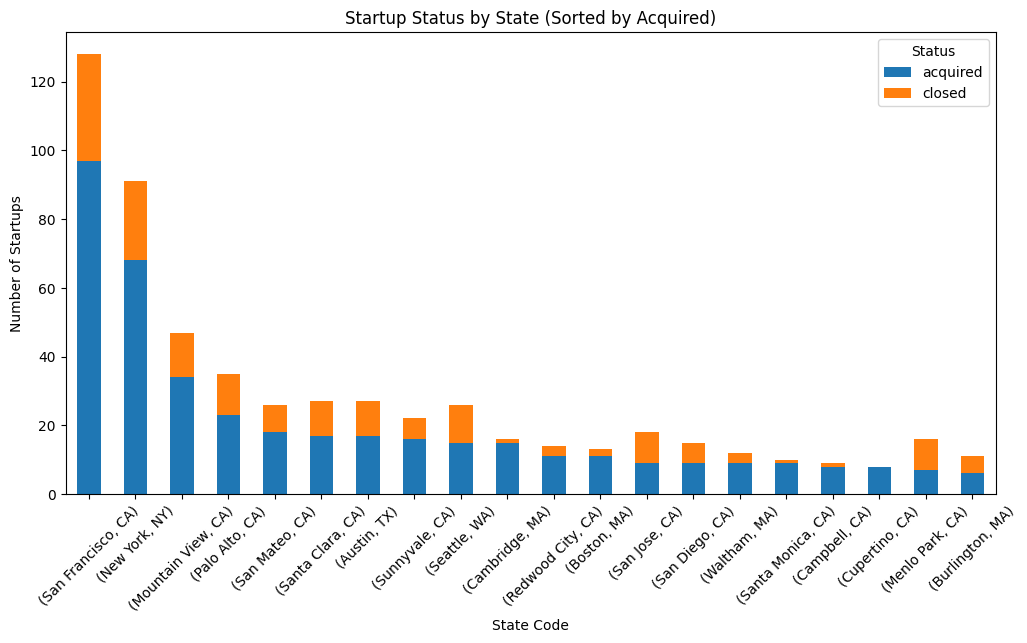

In [55]:
status_by_city = df.groupby(["city", "state_code", "status"]).size().unstack(fill_value=0).sort_values("acquired", ascending=False).head(20)

status_by_city.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Startup Status by State (Sorted by Acquired)")
plt.xlabel("State Code")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.show()

### Which sector has the most startups?

In [54]:
df.groupby(["category_code"]).size() \
    .reset_index(name="startup_count") \
    .sort_values(by="startup_count", ascending=False) \
    .reset_index(drop=True) \
    .head()

,category_code,startup_count
0,software,153
1,web,144
2,mobile,79
3,enterprise,73
4,advertising,62


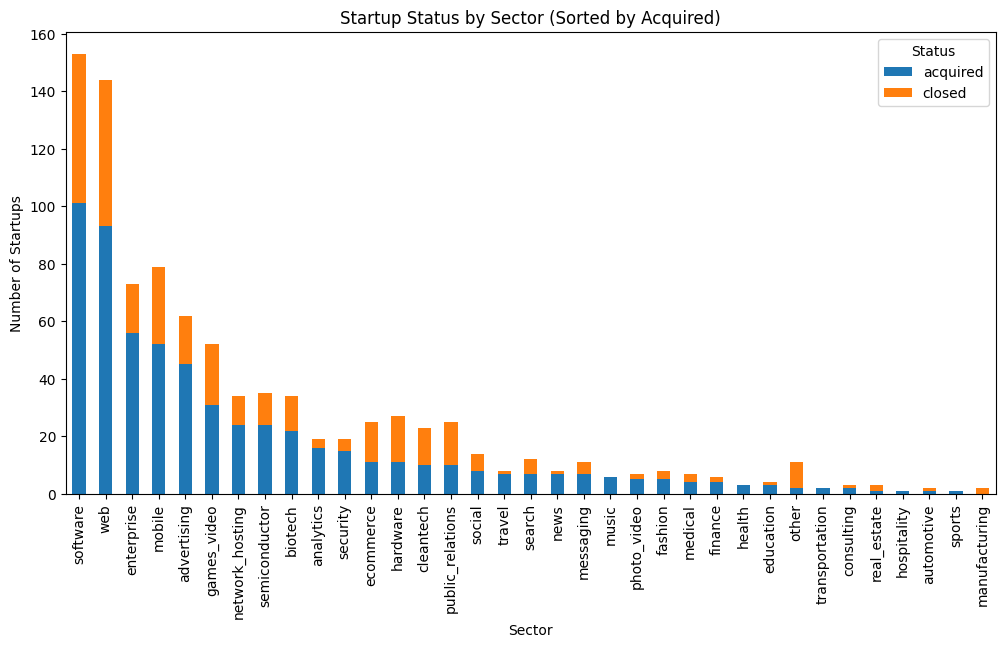

In [ ]:
status_by_category = df.groupby(["category_code", "status"]).size().unstack(fill_value=0).sort_values("acquired", ascending=False)

status_by_category.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Startup Status by Sector (Sorted by Acquired)")
plt.xlabel("Sector")
plt.ylabel("Number of Startups")
plt.xticks(rotation=90)
plt.legend(title="Status")
plt.show()

### When do most startups secure their first funding round?

In [ ]:
df_temp = df[df["age_first_funding_year"] > 0].dropna()

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, float('inf')]
bin_labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-15", "15-20", "20+"]

pd.cut(df_temp["age_first_funding_year"], bins=bins, labels=bin_labels, right=False).value_counts()

age_first_funding_year
0-1      230
1-2      160
2-3       98
3-4       58
4-5       56
5-6       35
6-7       19
7-8       14
10-15      4
8-9        3
9-10       3
15-20      1
20+        1
Name: count, dtype: int64

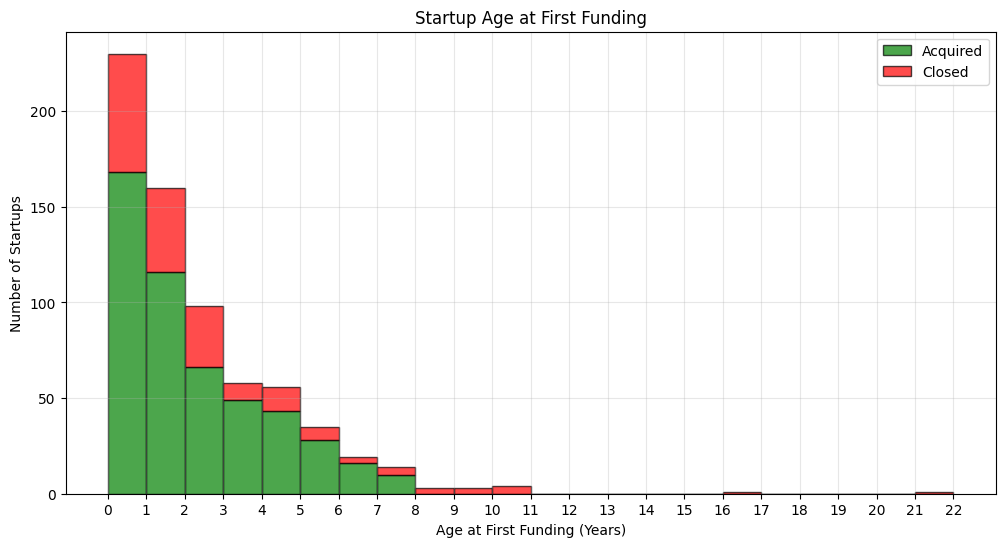

In [99]:
acquired_startups = df_temp[df_temp["status"] == "acquired"]["age_first_funding_year"]
closed_startups = df_temp[df_temp["status"] == "closed"]["age_first_funding_year"]

plt_bins = range(int(df_temp["age_first_funding_year"].max()) + 2)

plt.figure(figsize=(12, 6))
plt.hist([acquired_startups, closed_startups], bins=plt_bins, stacked=True, label=["Acquired", "Closed"], color=["green", "red"], alpha=0.7, edgecolor="black")
plt.title("Startup Age at First Funding")
plt.xlabel("Age at First Funding (Years)")
plt.ylabel("Number of Startups")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(plt_bins)
plt.show()

In [ ]:
# Do something with df.corr()